# World Population EDA and Predict

## Import & Describe Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WorldPopulation.csv')
data.shape

(70, 7)

In [3]:
data.columns

Index(['Year', 'Population', 'ChangePerc', 'NetChange', 'Density', 'Urban',
       'UrbanPerc'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        70 non-null     int64  
 1   Population  70 non-null     int64  
 2   ChangePerc  70 non-null     float64
 3   NetChange   70 non-null     int64  
 4   Density     70 non-null     int64  
 5   Urban       70 non-null     int64  
 6   UrbanPerc   70 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 4.0 KB


In [5]:
data.head()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [6]:
data.isnull().sum()

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

In [7]:
data = data.sort_values('Year').reset_index()

In [8]:
data

,index,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,69,1951,2584034261,1.88,47603112,17,775067697,30
1,68,1952,2630861562,1.81,46827301,18,799282533,30
2,67,1953,2677608960,1.78,46747398,18,824289989,31
3,66,1954,2724846741,1.76,47237781,18,850179106,31
4,65,1955,2773019936,1.77,48173195,19,877008842,32
...,...,...,...,...,...,...,...,...
65,4,2016,7464022049,1.14,84224910,50,4060652683,54
66,3,2017,7547858925,1.12,83836876,51,4140188594,55
67,2,2018,7631091040,1.10,83232115,51,4219817318,55
68,1,2019,7713468100,1.08,82377060,52,4299438618,56


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,70.0,3.450000e+01,2.035109e+01,0.000000e+00,1.725000e+01,3.450000e+01,5.175000e+01,6.900000e+01
Year,70.0,1.985500e+03,2.035109e+01,1.951000e+03,1.968250e+03,1.985500e+03,2.002750e+03,2.020000e+03
Population,70.0,5.002010e+09,1.594877e+09,2.584034e+09,3.570120e+09,4.915745e+09,6.361332e+09,7.794799e+09
ChangePerc,70.0,1.616429e+00,3.212883e-01,1.050000e+00,1.262500e+00,1.770000e+00,1.847500e+00,2.090000e+00
NetChange,70.0,7.511954e+07,1.256972e+07,4.674740e+07,7.314225e+07,7.942852e+07,8.356683e+07,9.290386e+07
Density,70.0,3.355714e+01,1.072399e+01,1.700000e+01,2.400000e+01,3.300000e+01,4.275000e+01,5.200000e+01
Urban,70.0,2.226815e+09,1.070191e+09,7.750677e+08,1.294408e+09,2.035272e+09,3.054260e+09,4.378994e+09
UrbanPerc,70.0,4.220000e+01,7.447595e+00,3.000000e+01,3.600000e+01,4.150000e+01,4.800000e+01,5.600000e+01


## Exploratory Data Analysis

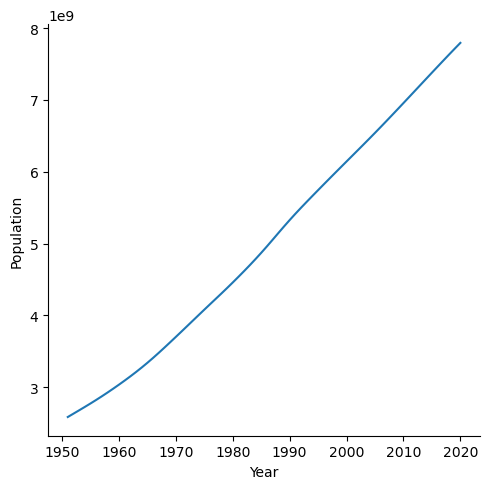

In [10]:
sns.relplot('Year','Population',data=data,kind='line')
plt.show()

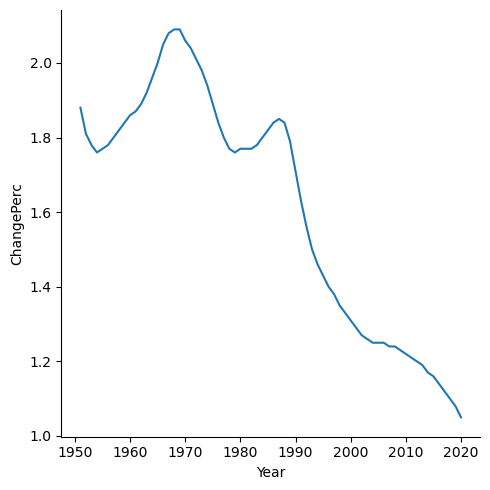

In [11]:
sns.relplot('Year','ChangePerc',data=data,kind='line')
plt.show()

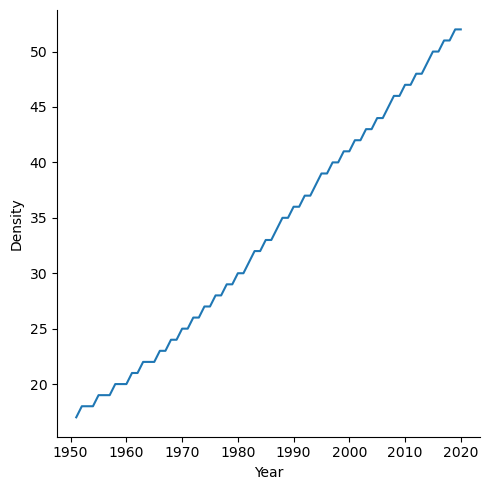

In [12]:
sns.relplot('Year','Density',data=data,kind='line')
plt.show()

In [13]:
data['Rural'] = data.Population - data.Urban
data['RuralPerc'] = (((data.Population-data.Urban)/data.Population)*100)
data['RuralPerc'] = data.RuralPerc.apply(lambda x: int(x))

In [14]:
data

,index,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc,Rural,RuralPerc
0,69,1951,2584034261,1.88,47603112,17,775067697,30,1808966564,70
1,68,1952,2630861562,1.81,46827301,18,799282533,30,1831579029,69
2,67,1953,2677608960,1.78,46747398,18,824289989,31,1853318971,69
3,66,1954,2724846741,1.76,47237781,18,850179106,31,1874667635,68
4,65,1955,2773019936,1.77,48173195,19,877008842,32,1896011094,68
...,...,...,...,...,...,...,...,...,...,...
65,4,2016,7464022049,1.14,84224910,50,4060652683,54,3403369366,45
66,3,2017,7547858925,1.12,83836876,51,4140188594,55,3407670331,45
67,2,2018,7631091040,1.10,83232115,51,4219817318,55,3411273722,44
68,1,2019,7713468100,1.08,82377060,52,4299438618,56,3414029482,44


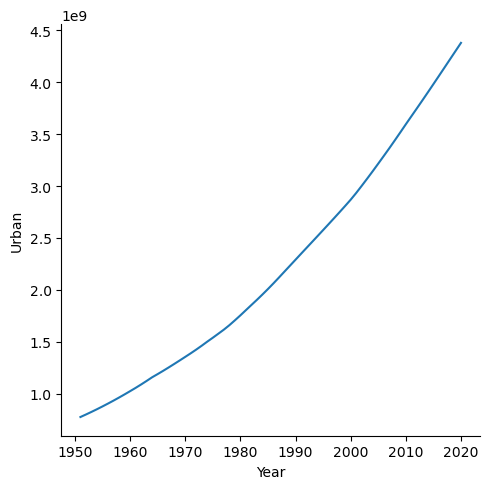

In [15]:
sns.relplot('Year','Urban',data=data,kind='line')
plt.show()

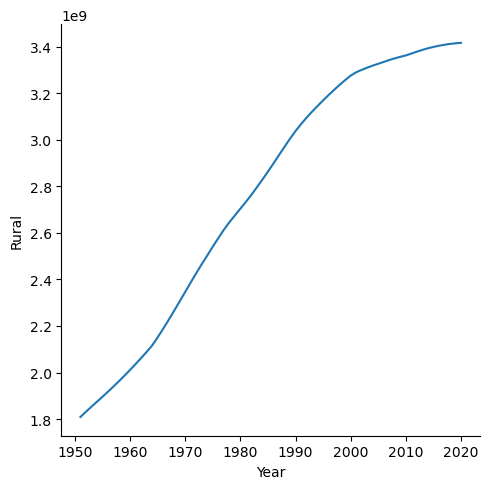

In [16]:
sns.relplot('Year','Rural',data=data,kind='line')
plt.show()

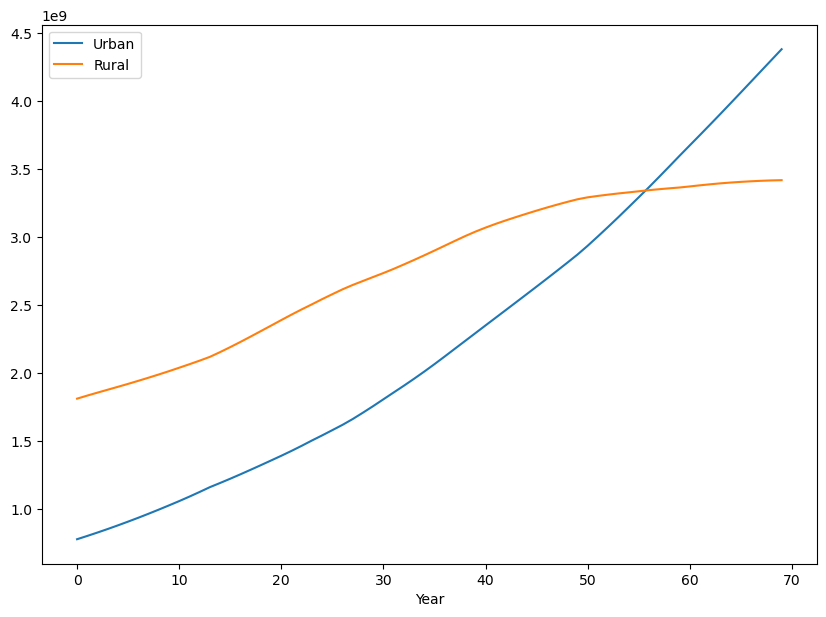

In [17]:
plt.figure(figsize=(10,7))
plt.plot(data.Urban,label='Urban')
plt.plot(data.Rural,label='Rural')
plt.xlabel('Year')
plt.legend()
plt.show()

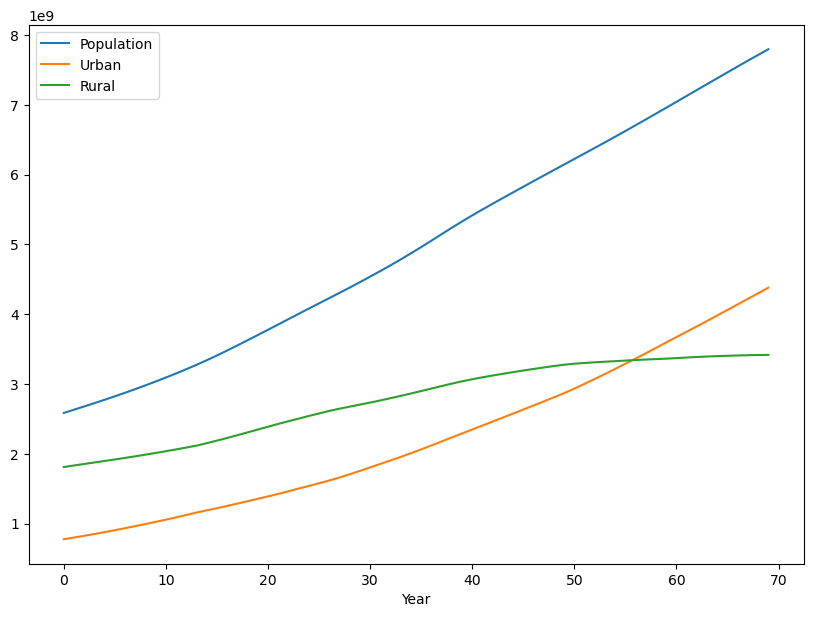

In [18]:
plt.figure(figsize=(10,7))
plt.plot(data.Population,label='Population')
plt.plot(data.Urban,label='Urban')
plt.plot(data.Rural,label='Rural')
plt.xlabel('Year')
plt.legend()
plt.show()

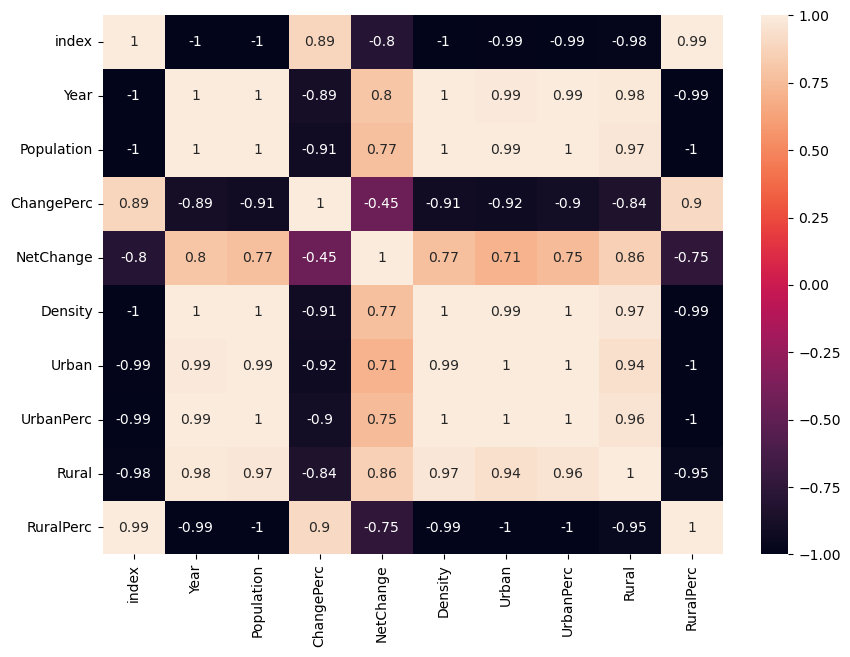

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,)
plt.show()

In [20]:
data.corr().loc['Population']

index        -0.998403
Year          0.998403
Population    1.000000
ChangePerc   -0.907773
NetChange     0.768659
Density       0.999640
Urban         0.993085
UrbanPerc     0.995669
Rural         0.973238
RuralPerc    -0.995343
Name: Population, dtype: float64

## Split data ke x dan y

In [21]:
data.drop(['NetChange','ChangePerc'],axis=1,inplace=True)

In [22]:
X = data.drop('Population',axis=1)
Y = data.Population

x_train = X.head(60)
x_test = X.tail(10)
y_train = Y.head(60)
y_test = Y.tail(10)

In [23]:
Model = LinearRegression()
Model.fit(x_train,y_train)
Model.score(x_test,y_test)

MAE = mean_absolute_error(y_true = y_test,y_pred = Model.predict(x_test))
print(f'Mean Absolute Error is {MAE}')

Mean Absolute Error is 1.9073486328125e-07


In [24]:
## Split data ke x dan y
x = data['Year']
y = data['Population']

x_arr = np.array(x)
y_arr = np.array(y)

In [25]:
## Split data menjadi data train dan data test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_arr,y_arr,test_size=0.3, random_state= 12)

### <b>Transformation data<b>

<b>Start Building Model<b>

In [26]:
# Start Building Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain.reshape(-1,1), np.log(ytrain))

LinearRegression()

In [27]:
pred = lr.predict(xtest.reshape(-1,1))

### Evaluation
step 1 - <b>RMSE, R2 Score<b>

step 2 - <b>Ridge or Lasso Regularization<b>

step 3 - <b>Evaluation Model<b>

### Step 1
#### Root Mean Square Error , Mean Absolute Error, R2 SCORE

In [28]:
## The coefficients
print('Coefficients: \n', lr.coef_)

## The Intercept
print('Intercept: \n', lr.intercept_)
from sklearn.metrics import mean_squared_error, mean_absolute_error
## The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, np.exp(pred), squared=False))

## R2
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(ytest, np.exp(pred)))

Coefficients: 
 [0.01649047]
Intercept: 
 -10.464160355041528
RMSE: 188353997.07
R2 score: 0.98


In [29]:
print("train Accuracy : ",lr.score(xtrain.reshape(-1,1),np.log(ytrain)))
print("test Accuracy : ",lr.score(xtest.reshape(-1,1),np.log(ytest)))

train Accuracy :  0.9917590281986397
test Accuracy :  0.9889193106125914


## Step 2 Model
#### Ridge Model

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [31]:
ridge_model = Ridge(alpha=5)
rd = Ridge(alpha = 5)
rd.fit(xtrain.reshape(-1,1), np.log1p(ytrain))

Ridge(alpha=5)

In [32]:
pred_rd = rd.predict(xtest.reshape(-1,1))

In [33]:
# The coefficients
print('Coefficients: \n', rd.coef_)

# The Intercept
print('Intercept: \n', rd.intercept_)

# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, np.expm1(pred_rd), squared=False))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(ytest, np.expm1(pred_rd)))

Coefficients: 
 [0.0164866]
Intercept: 
 -10.456493378603284
RMSE: 188137545.19
R2 score: 0.98


In [34]:
print("train Accuracy : ",rd.score(xtrain.reshape(-1,1),np.log1p(ytrain)))
print("test Accuracy : ",rd.score(xtest.reshape(-1,1),np.log1p(ytest)))

train Accuracy :  0.9917589737640207
test Accuracy :  0.9889279019949193


#### Lasso Model

In [35]:
lasso_model = Lasso(alpha=5)
ls = Lasso(alpha = 5)
ls.fit(xtrain.reshape(-1,1), np.log1p(ytrain))

Lasso(alpha=5)

In [36]:
pred_ls = ls.predict(xtest.reshape(-1,1))

In [37]:
# The coefficients
print('Coefficients: \n', ls.coef_)

# The Intercept
print('Intercept: \n', ls.intercept_)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 Variance score: %.2f' % r2_score(ytest, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))

Coefficients: 
 [0.00500753]
Intercept: 
 12.322913143427424
R2 Variance score: -12.46
RMSE: 5383960403.81


In [38]:
print("train Accuracy : ",ls.score(xtrain.reshape(-1,1),np.log1p(ytrain)))
print("test Accuracy : ",ls.score(xtest.reshape(-1,1),np.log1p(ytest)))

train Accuracy :  0.5108683531875815
test Accuracy :  0.49364633094114807


-------

## Step 3
#### Evaluation Model & Explanation

In [39]:
# The RMSE
print("RMSE of linear_regression: %.2f" % mean_squared_error(ytest, np.expm1(pred), squared=False))
print("RMSE of ridge: %.2f" % mean_squared_error(ytest, np.expm1(pred_rd), squared=False))
print("RMSE of lasso: %.2f" % mean_squared_error(ytest, pred, squared=False))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score of linear regression: %.2f' % r2_score(ytest, np.expm1(pred)))
print('R2 score of ridge: %.2f' % r2_score(ytest, np.expm1(pred_rd)))
print('R2 score of lasso: %.2f' % r2_score(ytest, pred))

print("train Accuracy of linear regression : ",lr.score(xtrain.reshape(-1,1),np.log1p(ytrain)))
print("test Accuracy of linear regression: ",lr.score(xtest.reshape(-1,1),np.log1p(ytest)))
print("train Accuracy of ridge : ",rd.score(xtrain.reshape(-1,1),np.log1p(ytrain)))
print("test Accuracy of ridge: ",rd.score(xtest.reshape(-1,1),np.log1p(ytest)))
print("train Accuracy of lasso: ",ls.score(xtrain.reshape(-1,1),np.log1p(ytrain)))
print("test Accuracy of lasso: ",ls.score(xtest.reshape(-1,1),np.log1p(ytest)))


RMSE of linear_regression: 188353997.18
RMSE of ridge: 188137545.19
RMSE of lasso: 5383960403.81
R2 score of linear regression: 0.98
R2 score of ridge: 0.98
R2 score of lasso: -12.46
train Accuracy of linear regression :  0.9917590282038353
test Accuracy of linear regression:  0.9889193105764024
train Accuracy of ridge :  0.9917589737640207
test Accuracy of ridge:  0.9889279019949193
train Accuracy of lasso:  0.5108683531875815
test Accuracy of lasso:  0.49364633094114807


# New dataframe
## World Population <i>Prediction Test<i> from 2020-2030

In [40]:
data

,index,Year,Population,Density,Urban,UrbanPerc,Rural,RuralPerc
0,69,1951,2584034261,17,775067697,30,1808966564,70
1,68,1952,2630861562,18,799282533,30,1831579029,69
2,67,1953,2677608960,18,824289989,31,1853318971,69
3,66,1954,2724846741,18,850179106,31,1874667635,68
4,65,1955,2773019936,19,877008842,32,1896011094,68
...,...,...,...,...,...,...,...,...
65,4,2016,7464022049,50,4060652683,54,3403369366,45
66,3,2017,7547858925,51,4140188594,55,3407670331,45
67,2,2018,7631091040,51,4219817318,55,3411273722,44
68,1,2019,7713468100,52,4299438618,56,3414029482,44


In [41]:
df_new = data.drop(['Density','Urban','UrbanPerc','Rural','RuralPerc'] ,axis = 1)

In [42]:
# Prediksi kasus confirmed tahun 2020-2030
df_new.tail()

,index,Year,Population
65,4,2016,7464022049
66,3,2017,7547858925
67,2,2018,7631091040
68,1,2019,7713468100
69,0,2020,7794798739


### Ridge Linear Regression Predict

In [59]:
xin = np.array([[70],[71],[72],[73],[74],[75],[76],[77],[78],[78],[79]])
ypred_rd = np.exp(rd.predict(xin.reshape(-1,1)))
ypred_rd

array([9.12022439e-05, 9.27183223e-05, 9.42596030e-05, 9.58265048e-05,
       9.74194535e-05, 9.90388823e-05, 1.00685231e-04, 1.02358948e-04,
       1.04060487e-04, 1.04060487e-04, 1.05790312e-04])

In [60]:
ypredd_rd = ypred_rd*100000000000000
ypredd_rd

array([9.12022439e+09, 9.27183223e+09, 9.42596030e+09, 9.58265048e+09,
       9.74194535e+09, 9.90388823e+09, 1.00685231e+10, 1.02358948e+10,
       1.04060487e+10, 1.04060487e+10, 1.05790312e+10])

In [61]:
prediction_ridge = pd.DataFrame({'Year': 
                           ['2021', '2022',
                          '2023','2024',
                          '2025','2025',
                          '2026','2028','2029','2030','2031'],
                        'Population': [9120224386, 9271832234, 9425960299,9582650475, 9741945352,
                                      9903888229, 10068523124,10235894788, 10406048714,10406048714,
                                      10579031153]})
prediction_ridge

,Year,Population
0,2021,9120224386
1,2022,9271832234
2,2023,9425960299
3,2024,9582650475
4,2025,9741945352
5,2025,9903888229
6,2026,10068523124
7,2028,10235894788
8,2029,10406048714
9,2030,10406048714


## Visual Predictor

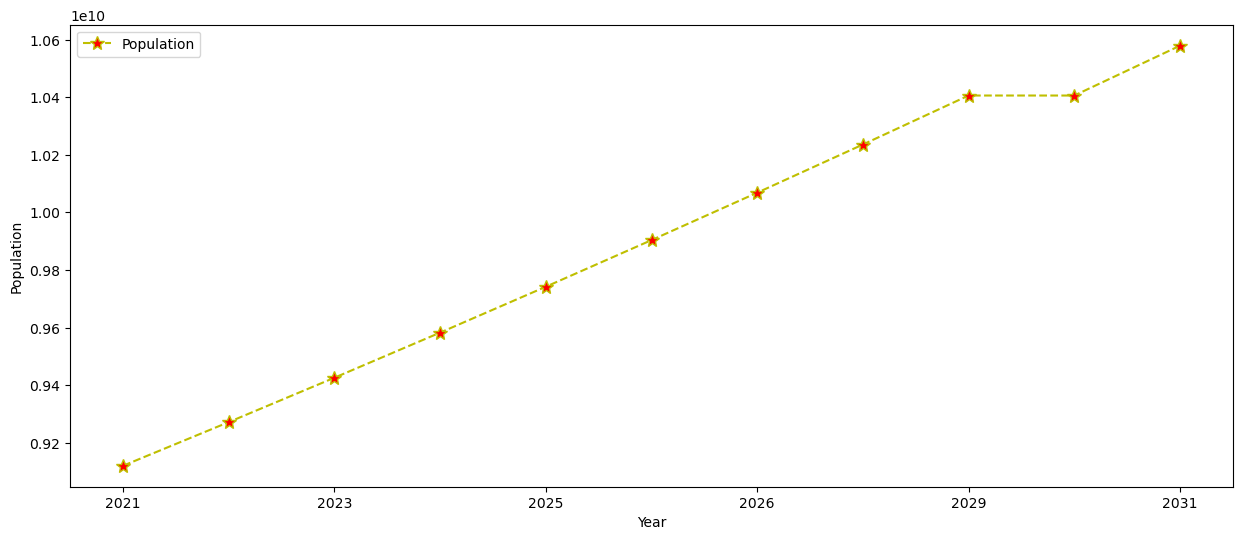

In [62]:
prediction_ridge.columns = ['Year','Population']
prediction_ridge.plot(x='Year',y='Population',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)

plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

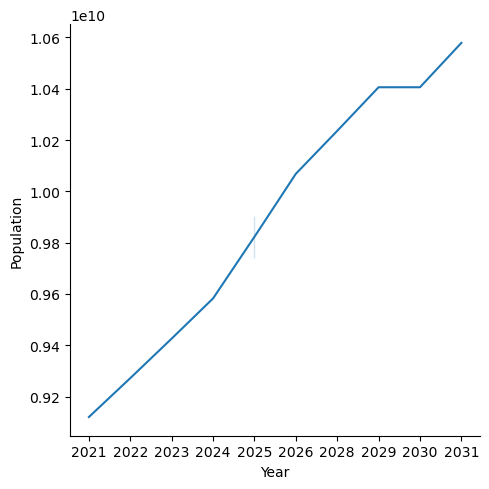

In [63]:
sns.relplot('Year','Population',data=prediction_ridge,kind='line')
plt.show()

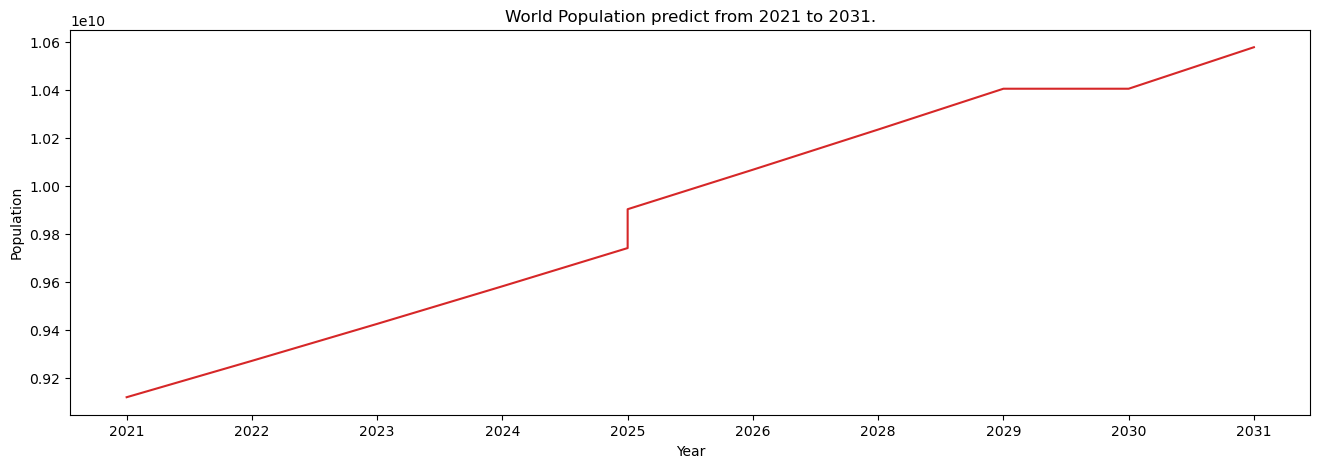

In [48]:
# Draw Plot
def plot_df(prediction_ridge, x, y, title="", xlabel='Year', ylabel='Population', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(prediction_ridge, x=prediction_ridge.Year, y=prediction_ridge.Population, title='World Population predict from 2021 to 2031.')